# House price prediction 

## About dataset

### Dataset is downloaded from kaggle. dataset consists of 6 columns namely avg_income, avg_area_house_age, avg_area_num_rooms, avg_bedrooms,avg_population and price.


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df = pd.read_csv('house_price_prediction.csv')

In [3]:
df.head(5)

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price
0,1,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,1,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,1,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,1,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [4]:
df.describe()

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population,price
count,5012.0,5009.000000,5010.000000,5011.000000,5012.000000,5009.000000,5.012000e+03
mean,1.0,68577.804938,5.977508,6.987906,3.982095,36155.832559,1.231947e+06
std,0.0,10661.033166,0.991472,1.006453,1.233945,9928.823462,3.529525e+05
min,1.0,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,1.0,61482.244790,5.322274,6.298437,3.140000,29403.512060,9.981375e+05
50%,1.0,68814.925610,5.969828,7.003188,4.050000,36183.287800,1.232983e+06
75%,1.0,75780.621120,6.652302,7.667048,4.490000,42841.741620,1.471756e+06
max,1.0,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X_0                 5012 non-null   int64  
 1   avg_income          5009 non-null   float64
 2   avg_area_house_age  5010 non-null   float64
 3   avg_area_num_rooms  5011 non-null   float64
 4   avg_bedrooms        5012 non-null   float64
 5   avg_population      5009 non-null   float64
 6   price               5012 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 274.2 KB


### Some rows of features contain null values. This may affect the performance of the model. Therefore we drop the samples containing null values.

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5005 entries, 0 to 5011
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   X_0                 5005 non-null   int64  
 1   avg_income          5005 non-null   float64
 2   avg_area_house_age  5005 non-null   float64
 3   avg_area_num_rooms  5005 non-null   float64
 4   avg_bedrooms        5005 non-null   float64
 5   avg_population      5005 non-null   float64
 6   price               5005 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 312.8 KB


## Feature scaling
### Scaling down features to the same range for better performance and reduce computations  using mean square normalization.

In [8]:
scaled_df = (df - df.mean()) / df.std()

## Data visualization

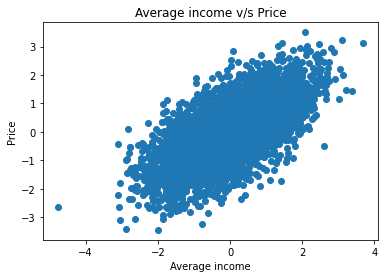

In [9]:
plt.scatter(scaled_df['avg_income'],scaled_df['price'])
plt.xlabel("Average income")
plt.ylabel("Price")
plt.title("Average income v/s Price")
plt.show()

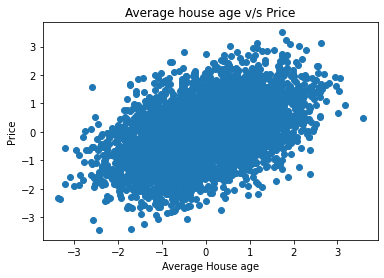

In [10]:
plt.scatter(scaled_df['avg_area_house_age'],scaled_df['price'])
plt.xlabel("Average House age")
plt.ylabel("Price")
plt.title("Average house age v/s Price")
plt.show()

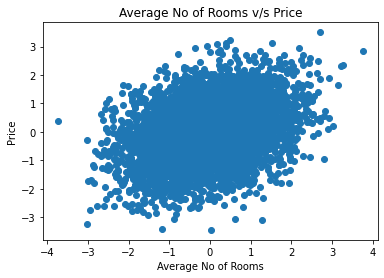

In [11]:
plt.scatter(scaled_df['avg_area_num_rooms'],scaled_df['price'])
plt.xlabel("Average No of Rooms")
plt.ylabel("Price")
plt.title("Average No of Rooms v/s Price")
plt.show()

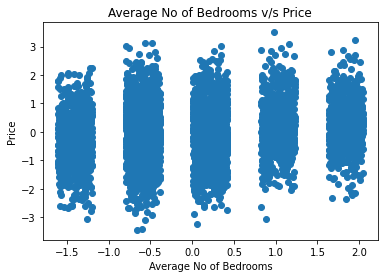

In [12]:
plt.scatter(scaled_df['avg_bedrooms'],scaled_df['price'])
plt.xlabel("Average No of Bedrooms")
plt.ylabel("Price")
plt.title("Average No of Bedrooms v/s Price")
plt.show()

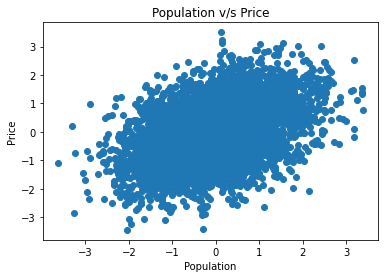

In [13]:
plt.scatter(scaled_df['avg_population'],scaled_df['price'])
plt.xlabel("Population")
plt.ylabel("Price")
plt.title("Population v/s Price")
plt.show()

## Train and Test Split

In [14]:
# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:,:-1],scaled_df['price'], test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3753, 6) (1252, 6) (3753,) (1252,)


In [15]:
X_train['X_0']=1
X_train

,X_0,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population
3384,1,-0.548884,-1.238455,0.570134,-0.471554,0.333841
810,1,-0.189515,0.347517,1.372915,0.184935,0.923140
4390,1,0.526049,-0.549459,0.234750,-0.682279,-2.166045
1771,1,0.762134,0.434314,-0.952678,0.120097,1.684253
182,1,-0.305808,1.449701,-0.253826,-1.606226,1.978249
...,...,...,...,...,...,...
2880,1,0.367541,0.637371,0.517859,0.201145,0.459444
3187,1,-0.897817,-0.098012,0.230727,2.032830,-0.254929
4283,1,1.672604,-0.235085,-1.147822,-0.503973,0.265704
1169,1,1.002583,-0.837778,0.518889,2.000411,-0.003310


In [16]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [32]:
n= 6
t = np.zeros(n)
m = len(X_train)
alpha = 0.2
epochs = 50
cost = np.array([])
theta_0 = np.array([])
theta_1 = np.array([])
theta_2 = np.array([])
theta_3 = np.array([])
theta_4 = np.array([])
theta_5 = np.array([])

In [33]:
for epoch in range(0,epochs):
    for j in range(n):
        for i in range(m):
            t[j] = t[j] - (alpha/m)*((sum(X_train[i]*t)-y_train[i])*X_train[i][j])
            c = ((sum(X_train[i]*t)-y_train[i])**2)/(2*m)
    print(c)
    cost = np.append(cost,c,axis = None)
    theta_0 = np.append(theta_0,t[0],axis = None) 
    theta_1 = np.append(theta_1,t[1],axis = None)
    theta_2 = np.append(theta_2,t[2],axis = None)
    theta_3 = np.append(theta_3,t[3],axis = None)
    theta_4 = np.append(theta_4,t[4],axis = None)
    theta_5 = np.append(theta_5,t[5],axis = None)

0.000658115029239116
0.0004632631409282319
0.000330443622897613
0.0002391974634133248
0.00017597715483787704
0.000131771381326699
0.00010055713556606494
7.828763208154177e-05
6.222831348206926e-05
5.051973174636169e-05
4.188876851753396e-05
3.545715140475267e-05
3.061399016460244e-05
2.6930574092937402e-05
2.4103160766917373e-05
2.1914369865309784e-05
2.0206989562755014e-05
1.886609750643693e-05
1.780677580609723e-05
1.6965607829194523e-05
1.6294745317182486e-05
1.5757732770467583e-05
1.532654111388665e-05
1.4979439562914005e-05
1.4699453092269076e-05
1.4473232559829337e-05
1.4290218308572998e-05
1.4142014534904011e-05
1.4021916569091607e-05
1.3924550255049664e-05
1.3845594374322549e-05
1.3781565228612098e-05
1.3729648215493577e-05
1.3687565271395467e-05
1.3653469934159397e-05
1.3625863848249705e-05
1.3603530040361823e-05
1.358547939783462e-05
1.3570907601615944e-05
1.3559160379521182e-05
1.354970541009291e-05
1.3542109562282681e-05
1.3536020429641084e-05
1.3531151330141655e-05
1.35272

In [34]:
t

array([0.00175713, 0.65119249, 0.46741684, 0.34496668, 0.00717037,
       0.42872912])

In [35]:
Epochs = list(range(epochs))

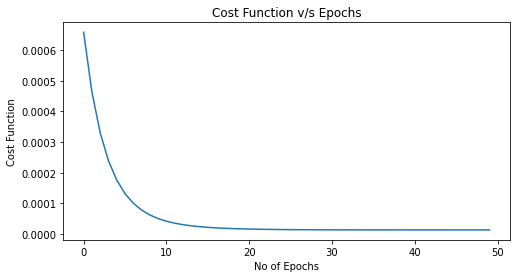

In [36]:
plt.figure(figsize=(8,4))
plt.plot(Epochs,cost)
plt.xlabel("No of Epochs")
plt.ylabel("Cost Function")
plt.title("Cost Function v/s Epochs")
plt.show()

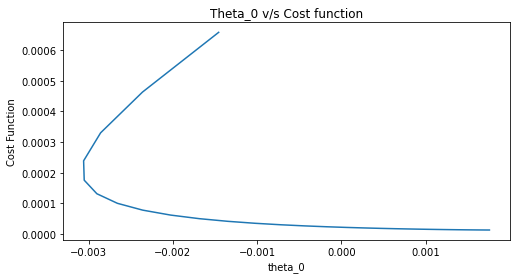

In [37]:
plt.figure(figsize=(8,4))
plt.plot(theta_0,cost)
plt.xlabel("theta_0")
plt.ylabel("Cost Function")
plt.title("Theta_0 v/s Cost function")
plt.show()

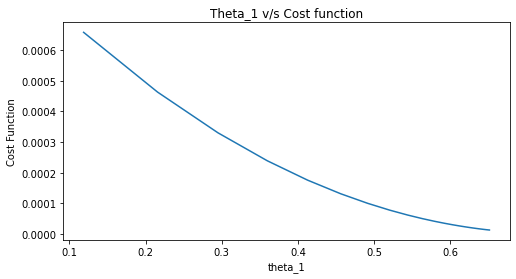

In [38]:
plt.figure(figsize=(8,4))
plt.plot(theta_1,cost)
plt.xlabel("theta_1")
plt.ylabel("Cost Function")
plt.title("Theta_1 v/s Cost function")
plt.show()

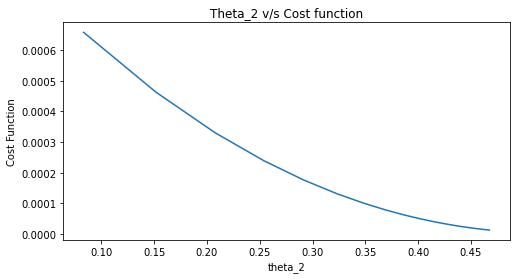

In [39]:
plt.figure(figsize=(8,4))
plt.plot(theta_2,cost)
plt.xlabel("theta_2")
plt.ylabel("Cost Function")
plt.title("Theta_2 v/s Cost function")
plt.show()

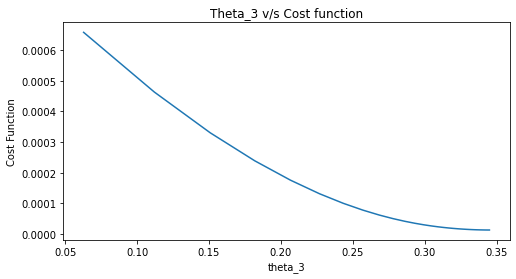

In [40]:
plt.figure(figsize=(8,4))
plt.plot(theta_3,cost)
plt.xlabel("theta_3")
plt.ylabel("Cost Function")
plt.title("Theta_3 v/s Cost function")
plt.show()

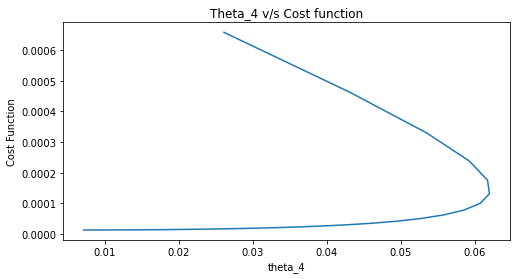

In [41]:
plt.figure(figsize=(8,4))
plt.plot(theta_4,cost)
plt.xlabel("theta_4")
plt.ylabel("Cost Function")
plt.title("Theta_4 v/s Cost function")
plt.show()

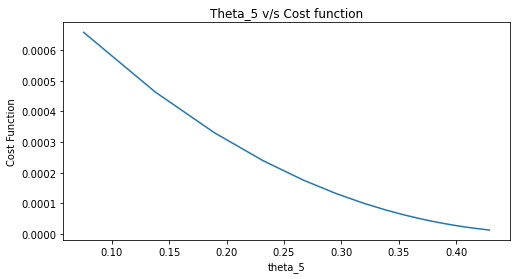

In [42]:
plt.figure(figsize=(8,4))
plt.plot(theta_5,cost)
plt.xlabel("theta_5")
plt.ylabel("Cost Function")
plt.title("Theta_5 v/s Cost function")
plt.show()

In [43]:
# fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(3
# fig.suptitle('Theta v/s Cost Function')
# ax1.plot(theta_0,cost)
# ax2.plot(theta_1,cost)
# ax3.plot(theta_2,cost)
# ax4.plot(theta_3,cost)
# ax5.plot(theta_4,cost)
# ax6.plot(theta_5,cost)


In [44]:
# from sklearn.linear_model import LinearRegression
# import matplotlib.pyplot as plt

# lm = LinearRegression()
# lm.fit(X_train, y_train)


# y_pred_from_sklearn = lm.predict(X_test)

# plt.scatter(y_test, y_pred_from_sklearn)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
# plt.show()


## Predictions

In [30]:
#### Sample implementations of house price prediction model
avg_income = float(input("Enter your average income rs:"))
avg_area_house_age = float(input("Enter expected area of house in sqft:"))
avg_area_num_rooms = float(input("Enter expected no of rooms :"))
avg_bedrooms = float(input("Enter expected no of bedrooms :"))
avg_population = float(input("Enter average population in that area :"))

new = sum(t*[1,avg_income,avg_area_house_age,avg_area_num_rooms,avg_bedrooms,avg_population])
print("The predicted house price is rs.","{:.2f}".format(new),"/-")

Enter your average income rs:3456
Enter expected area of house in sqft:6
Enter expected no of rooms :7
Enter expected no of bedrooms :9
Enter average population in that area :999000000
The predicted house price is rs. 428302642.74 /-
